# Polynomial Regression

#### Polynomial features with linear regression
Transform two dimensional points into a set of 5 dimensional pointsby relying only on the information of two-dimensional points
$x = (x_0, x_1) \to x' = (x_0, x_1, x_0^2, x_1^2, x_0x_1)$

#### Predicted output
The new regression problem

$\hat{y} = \hat{w_0}x_0 + \hat{w_1}x_1 + \hat{w_{00}}x_0^2 + \hat{w_{11}}x_1^2 + \hat{w_{01}}x_0x_1 + b$

#### Why Polynomial Feature Transformation
* Polynomial future transformation can be use to transform a problem into a higher dimensional regression space. Adding these extra polynomial features allows us a much richer set of complex functions that we can use to fit to the data. Intuitively, this is allowing polynomials to be fit to the training data instead of simply a straight line, but using the same least-squares criterion that minimizes mean squared error.
*  A simple linear model could not capture this nonlinear relationship, but by adding nonlinear features like polynomials to the linear regression model, we can capture this nonlinearity.

#### Downside of Polynomial Regression
One side effect of adding lots of new features especially when we're taking every possible combination of K variables, is that these more complex models have the potential for overfitting. So in practice, polynomial regression is often done with a regularized learning method like ridge regression. 

### 1. Import Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

### 2. Synthetic Dataset

<IPython.core.display.Javascript object>


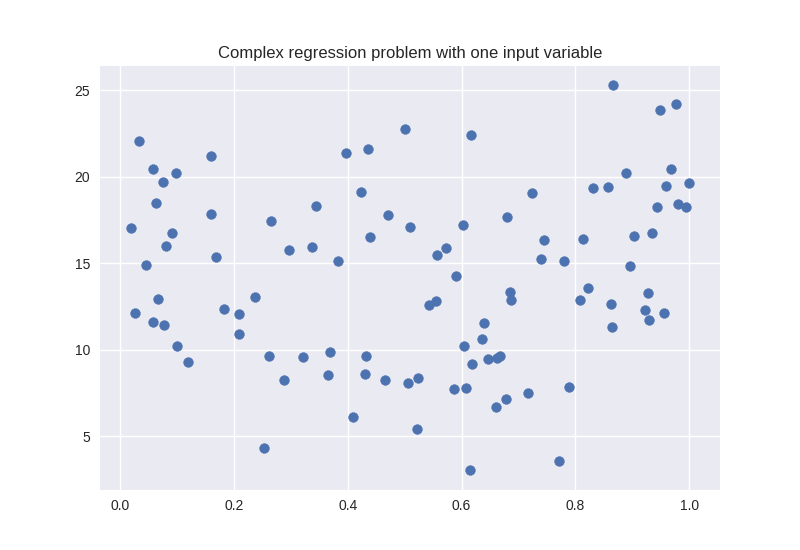

In [2]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)


### 3. Importing Regression Libraries

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

### 4. Linear Regression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [  4.42036739   5.99661447   0.52894712  10.23751345   6.5507973
  -2.02082636  -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722


### 4. Polynomial Regression

In [7]:
print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')


Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[  3.40951018e-12   1.66452443e+01   2.67285381e+01  -2.21348316e+01
   1.24359227e+01   6.93086826e+00   1.04772675e+00   3.71352773e+00
  -1.33785505e+01  -5.73177185e+00   1.61813184e+00   3.66399592e+00
   5.04513181e+00  -1.45835979e+00   1.95156872e+00  -1.51297378e+01
   4.86762224e+00  -2.97084269e+00  -7.78370522e+00   5.14696078e+00
  -4.65479361e+00   1.84147395e+01  -2.22040650e+00   2.16572630e+00
  -1.27989481e+00   1.87946559e+00   1.52962716e-01   5.62073813e-01
  -8.91697516e-01  -2.18481128e+00   1.37595426e+00  -4.90336041e+00
  -2.23535458e+00   1.38268439e+00  -5.51908208e-01  -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in 

### 6. Polynomial with Regularization (Ridge)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly deg 2 + ridge) linear model intercept (b): 5.418
(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825


### 7. Polynomial Regression effect of degree

In [12]:
degree = [2,3,4,5,6]
train_score = []
test_score = []
for this_degree in degree:
    poly = PolynomialFeatures(degree = this_degree)
    X_poly = poly.fit_transform(X_F1)
    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
    linreg = Ridge().fit(X_train, y_train)

    r2_train = linreg.score(X_train, y_train)
    r2_test = linreg.score(X_test, y_test)
    train_score = np.append(train_score, r2_train)
    test_score = np.append(test_score,r2_test) 
    num_coeff_bigger = np.sum(abs(linreg.coef_) > 1.0)
    print('Degree = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_degree, num_coeff_bigger, r2_train, r2_test))

Degree = 2.00
num abs(coeff) > 1.0: 24, r-squared training: 0.83, r-squared test: 0.83

Degree = 3.00
num abs(coeff) > 1.0: 24, r-squared training: 0.83, r-squared test: 0.83

Degree = 4.00
num abs(coeff) > 1.0: 24, r-squared training: 0.83, r-squared test: 0.83

Degree = 5.00
num abs(coeff) > 1.0: 24, r-squared training: 0.83, r-squared test: 0.83

Degree = 6.00
num abs(coeff) > 1.0: 24, r-squared training: 0.83, r-squared test: 0.83

